In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Load dats
wnut_results = pd.read_csv("./lr_wnut17_roberta-base_stratified_samples.tsv", delimiter="\t").drop(columns=["iteration", "seed"])
# wikiann_d= pd.read_csv("./germanler_gottbert_base_last_stratified_samples.tsv", delimiter="\t").drop(columns=["iteration", "seed"])

# Group data by model, aug_strategy, ratio
avg_wnut_results = wnut_results.groupby(["model_name", "aug_strategy", "ratio"]).mean().reset_index()
# avg_germanler_results = germanler_results.groupby(["model_name", "aug_strategy", "ratio"]).mean().reset_index()

In [33]:
# no_augmentation_f1 = avg_wnut_results.loc[avg_wnut_results.aug_strategy == "no_augmentation"]["f1"].iloc[0]
avg_wnut_results.pivot(index="aug_strategy", columns="ratio", values="f1")


ratio,0.1,0.3,0.5,1.0
aug_strategy,,,,
all,0.489965,0.528788,0.509690,0.556830
delete_character,0.404305,0.519671,0.545781,0.562931
no_augmentation,0.318569,0.515247,0.556164,0.578105
reverse_letter_case,0.398287,0.518419,0.539640,0.570842
substitute_character,0.390870,0.517300,0.539183,0.573903
swap_characters,0.391203,0.516032,0.534030,0.560406


In [34]:
avg_wnut_results.pivot(index="aug_strategy", columns="ratio", values="recall")


ratio,0.1,0.3,0.5,1.0
aug_strategy,,,,
all,0.528082,0.531603,0.544764,0.563299
delete_character,0.418536,0.532901,0.542539,0.515663
no_augmentation,0.329008,0.487303,0.519741,0.524560
reverse_letter_case,0.415570,0.532715,0.572196,0.538462
substitute_character,0.405005,0.529750,0.549398,0.536979
swap_characters,0.405746,0.514551,0.565153,0.564597


In [35]:
avg_wnut_results.pivot(index="aug_strategy", columns="ratio", values="precision")


ratio,0.1,0.3,0.5,1.0
aug_strategy,,,,
all,0.457087,0.526100,0.479330,0.551202
delete_character,0.391619,0.508491,0.553476,0.622591
no_augmentation,0.309751,0.546876,0.600002,0.645468
reverse_letter_case,0.383063,0.505549,0.511465,0.609353
substitute_character,0.378827,0.506028,0.530813,0.619800
swap_characters,0.378170,0.517729,0.506563,0.556513


In [36]:
# Plot results with seaborn and matplotlib
def plot_curves(inp_data,x,y,hue="aug_strategy"):
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    sns.set_style()
    sns.lineplot(data=inp_data, x=x, y=y, hue=hue, marker="o", style=hue)
    
    plt.ylabel(y.title())
    plt.xlabel("Ratio of training samples for augmentation")
    ax.legend(loc="upper right", bbox_to_anchor=(1.35, 1))
    plt.xticks(np.arange(0.1, 1, step=0.2))
    
def plot_linear(inp_data, x,y, hue):
    plt.figure(figsize=(10,6), dpi=100)
    sns.set_style()
    sns.lmplot(
    data=inp_data, x=x, y=y, col=hue, hue=hue,
    col_wrap=3,
    height=5, scatter_kws={"s": 50, "alpha": 1}
)
    plt.ylabel(y.title())
    
def plot_box(inp_data, x,y, hue):
    plt.figure(figsize=(10,6), dpi=100)
    sns.set_style()
    sns.boxplot(inp_data, x=x, y=y, hue=hue)
    plt.xlabel("Ratio of training samples for augmentation")
    plt.ylabel(y.title())

    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

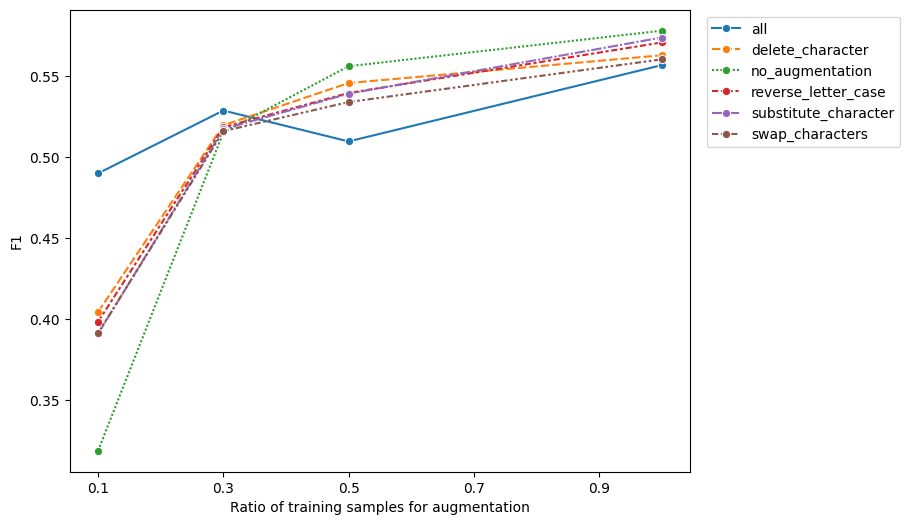

In [37]:
# Plot stratified results
plot_curves(avg_wnut_results, x="ratio", y="f1")
# plot_linear(wnut_results, x="ratio", y="f1", hue="aug_strategy")

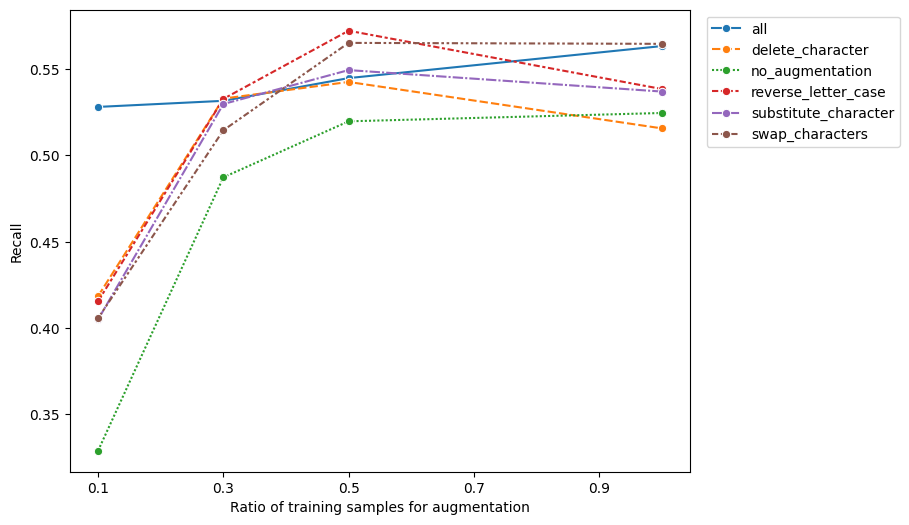

<Figure size 1000x600 with 0 Axes>

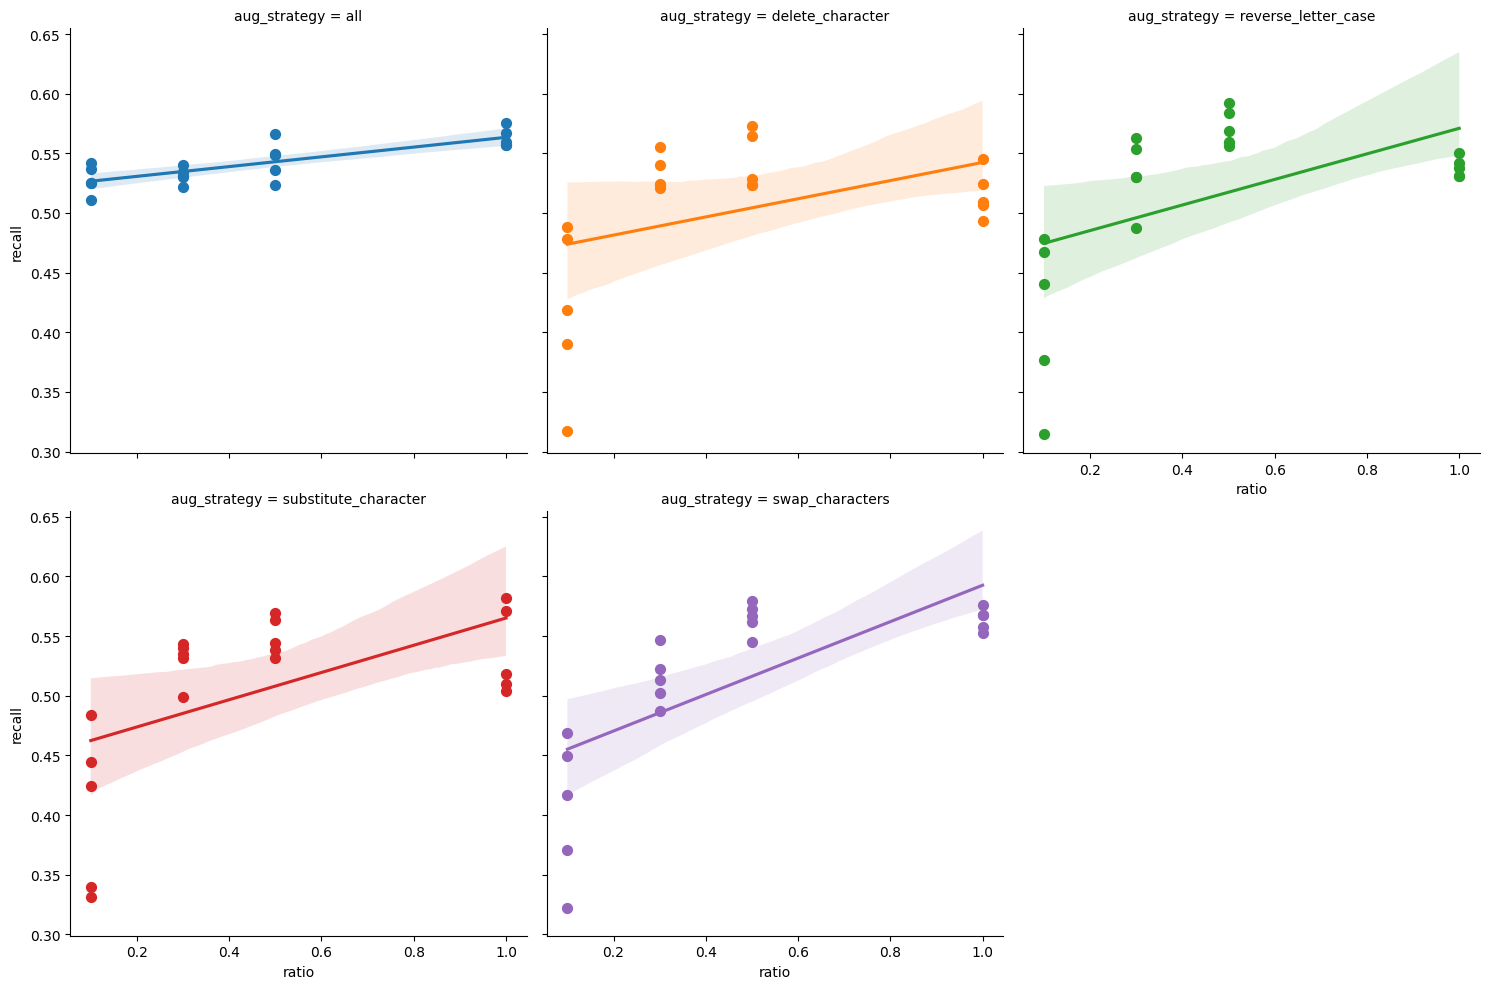

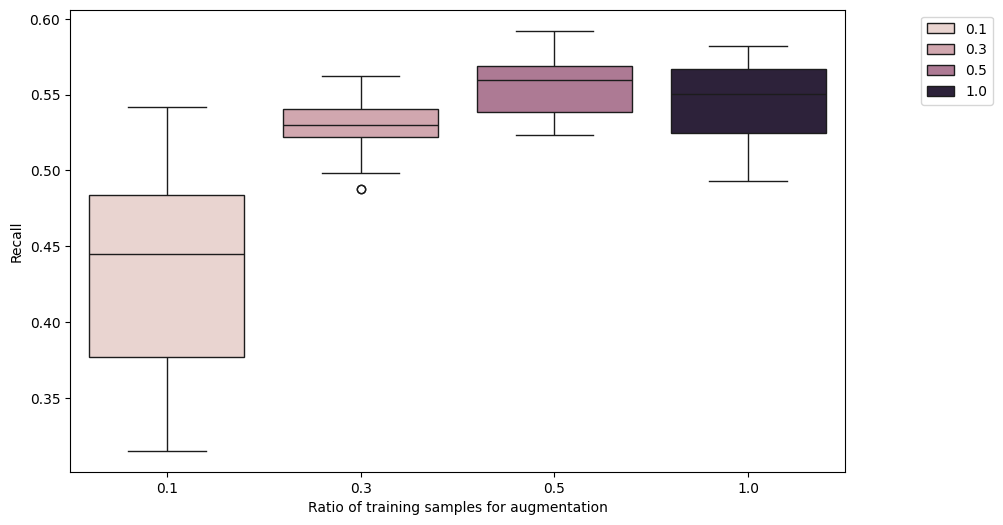

In [38]:
# Plot stratified results
plot_curves(avg_wnut_results, x="ratio", y="recall")
plot_linear(wnut_results.loc[wnut_results.aug_strategy!="no_augmentation"].sort_values(by=["aug_strategy"]), x="ratio", y="recall", hue="aug_strategy")
plot_box(wnut_results.loc[wnut_results.aug_strategy!="no_augmentation"].sort_values(by=["aug_strategy"]), x="ratio", y="recall", hue="ratio")



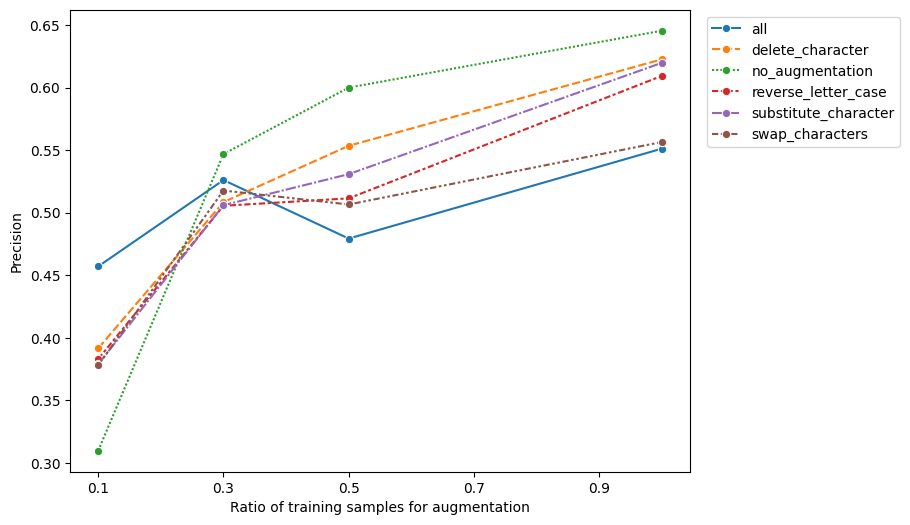

<Figure size 1000x600 with 0 Axes>

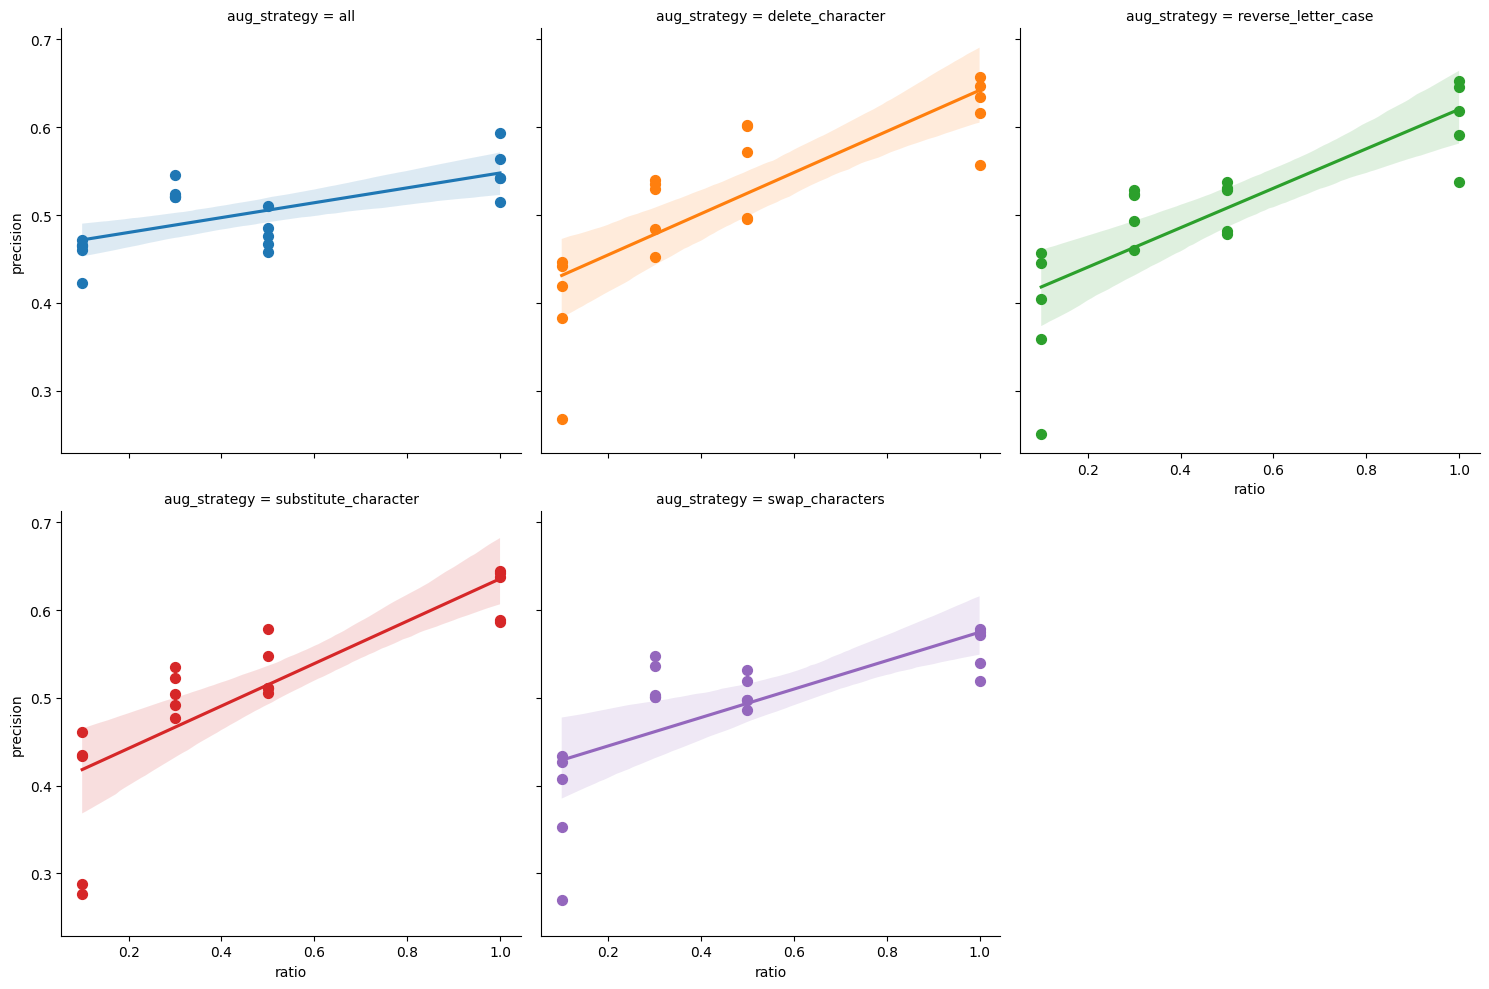

In [39]:
# Plot random samples results
plot_curves(avg_wnut_results, x="ratio", y="precision")
plot_linear(wnut_results.loc[wnut_results.aug_strategy!="no_augmentation"].sort_values(by=["aug_strategy"]), x="ratio", y="precision", hue="aug_strategy")

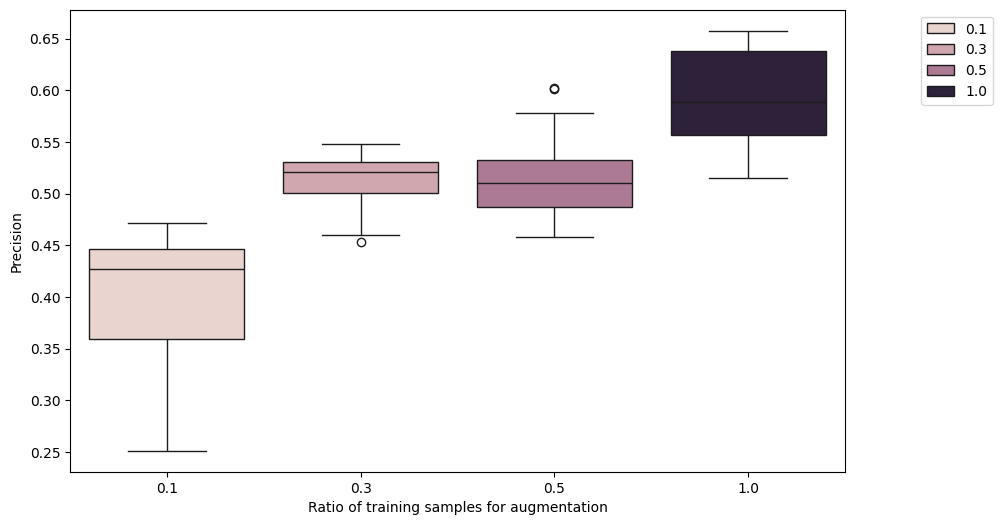

In [40]:
plot_box(wnut_results.loc[wnut_results.aug_strategy!="no_augmentation"].sort_values(by=["aug_strategy"]), x="ratio", y="precision", hue="ratio")